In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

df = pd.read_csv("data/mam17_test_data.csv")

df['Pi'] = df['Ii'] * df['Vi']
df['Po'] = df['Io'] * df['Vo']
df['Eff'] = df['Po'] / df['Pi']
df['Eff'] = df['Eff'].fillna(value=0)

print('Mean Eff:', df[1:]['Eff'].mean())

df

Mean Eff: 0.86599880950182


,Ii,Io,Vi,Vo,Pi,Po,Eff
0,0.0,0.0,0.0,0.0,0.00,0.00,0.000000
1,5.4,7.8,35.4,22.2,191.16,173.16,0.905838
2,17.1,29.9,33.0,16.5,564.30,493.35,0.874269
3,26.1,45.2,32.1,15.9,837.81,718.68,0.857808
4,32.9,59.2,31.1,15.2,1023.19,899.84,0.879446
5,41.4,74.6,30.3,14.5,1254.42,1081.70,0.862311
6,47.9,87.9,25.5,11.7,1221.45,1028.43,0.841975
7,55.0,106.4,22.1,9.6,1215.50,1021.44,0.840346


In [3]:
df['Io'] * (df['Vo'] / df['Vi']) / df['Eff']

0     NaN
1     5.4
2    17.1
3    26.1
4    32.9
5    41.4
6    47.9
7    55.0
dtype: float64

[ 9.04315320e-01  7.92106596e-08 -1.53241746e-05  1.17363841e+00]


/tmp/ipykernel_855534/1633319292.py:5: RuntimeWarning: divide by zero encountered in power
  return a*x**b + c*x**d
/tmp/ipykernel_855534/1633319292.py:5: RuntimeWarning: overflow encountered in power
  return a*x**b + c*x**d


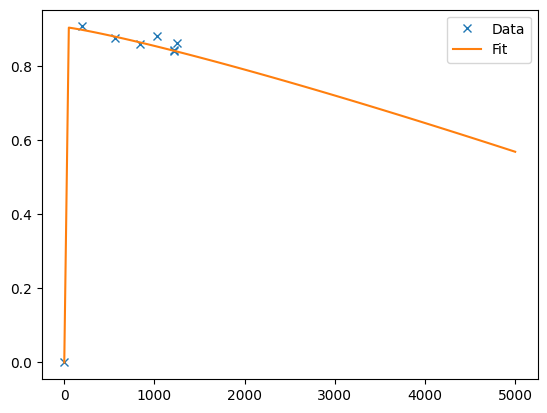

In [4]:
# Define the function to use for curve fitting
# def func(x, a, b):
#     return a*x**b
def func(x, a, b, c, d):
    return a*x**b + c*x**d
# def func(x, a, b, c, d):
#     x = x.clip(min=0)
#     return a*np.exp(-b/x) + c*np.exp(-d/x)

# Fit the curve to the data
popt, _ = curve_fit(func, df['Po'].to_numpy(), df['Eff'].to_numpy())
print(popt)

pi = np.linspace(0, 5000, 100)

# Plot the original data and the fitted curve
plt.plot(df['Pi'], df['Eff'], 'x', label='Data')
plt.plot(pi, func(pi, *popt), label='Fit')
plt.legend()
plt.show()


{0.0: 0.0, 101.01010101010101: 0.9008659875674055, 202.02020202020202: 0.8965339550850506, 303.030303030303: 0.8917916889224153, 404.04040404040404: 0.8867616989781612, 505.0505050505051: 0.8815063237069551, 606.060606060606: 0.8760640640983648, 707.070707070707: 0.8704613108462592, 808.0808080808081: 0.8647173928470953, 909.0909090909091: 0.8588471353429659, 1010.1010101010102: 0.8528623034471401, 1111.111111111111: 0.8467724820313317, 1212.121212121212: 0.8405856442518611, 1313.1313131313132: 0.8343085360886341, 1414.141414141414: 0.8279469462192784, 1515.1515151515152: 0.8215059012756635, 1616.1616161616162: 0.8149898107718802, 1717.171717171717: 0.8084025770447947, 1818.1818181818182: 0.801747680235099, 1919.1919191919192: 0.795028245059753, 2020.2020202020203: 0.7882470940383721, 2121.212121212121: 0.7814067904668033, 2222.222222222222: 0.7745096735105957, 2323.2323232323233: 0.7675578871582908, 2424.242424242424: 0.7605534043308197, 2525.252525252525: 0.7534980471266763, 2626.262

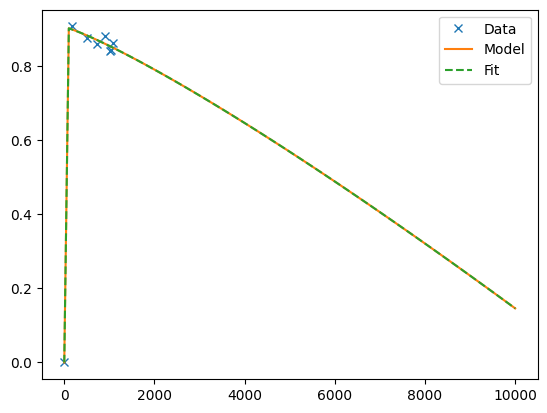

In [5]:
import bisect

def interpolate(lookup_table, value):
    sorted_keys = sorted(lookup_table.keys())

    # Check if value is below the lowest key
    if value < sorted_keys[0]:
        return lookup_table[sorted_keys[0]]

    # Check if value is above the highest key
    if value > sorted_keys[-1]:
        return lookup_table[sorted_keys[-1]]

    # Find the nearest lower and higher keys using bisect_left
    index = bisect.bisect_left(sorted_keys, value)
    if sorted_keys[index] == value:
        return lookup_table[value]

    low = sorted_keys[index - 1]
    high = sorted_keys[index]
    low_value = lookup_table[low]
    high_value = lookup_table[high]
    interpolation_ratio = (value - low) / (high - low)
    interpolated_value = low_value + (high_value - low_value) * interpolation_ratio
    return interpolated_value


po = np.linspace(0, 10000, 100)

# Use previous model
df2 = pd.DataFrame()
df2['Po'] = po
df2['Eff'] = func(po, *popt)

# Create a LUT from previous model
eff_lut = {po: eff for (po,eff) in df2[['Po', 'Eff']].to_numpy()}
eff = np.fromiter((interpolate(eff_lut, po) for po in po), po.dtype)
print(eff_lut)

# Plot the original data and the fitted curve
plt.plot(df['Po'], df['Eff'], 'x', label='Data')
plt.plot(df2['Po'], df2['Eff'], label='Model')
plt.plot(po, eff, '--', label='Fit')
plt.legend()
plt.show()